# Lab 1

In [10]:
%%capture
import sys
!{sys.executable} -m pip install --user scipy numpy matplotlib pandas

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=22)
matplotlib.rc('figure', figsize=(18, 10))

In [12]:
import numpy as np
import pandas as pd
from scipy import stats

## Standard Normal Distribution, μ=0, σ=1

For the standard normal distribution, the following is a Z table, integrating from 0 to Z.

| z   | +0.00   | +0.01   | +0.02   | +0.03   | +0.04   | +0.05   | +0.06   | +0.07   | +0.08   | +0.09   |
|-----|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| 0.0 | 0.00000 | 0.00399 | 0.00798 | 0.01197 | 0.01595 | 0.01994 | 0.02392 | 0.02790 | 0.03188 | 0.03586 |
| 0.1 | 0.03983 | 0.04380 | 0.04776 | 0.05172 | 0.05567 | 0.05962 | 0.06356 | 0.06749 | 0.07142 | 0.07535 |
| 0.2 | 0.07926 | 0.08317 | 0.08706 | 0.09095 | 0.09483 | 0.09871 | 0.10257 | 0.10642 | 0.11026 | 0.11409 |
| 0.3 | 0.11791 | 0.12172 | 0.12552 | 0.12930 | 0.13307 | 0.13683 | 0.14058 | 0.14431 | 0.14803 | 0.15173 |
| 0.4 | 0.15542 | 0.15910 | 0.16276 | 0.16640 | 0.17003 | 0.17364 | 0.17724 | 0.18082 | 0.18439 | 0.18793 |
| 0.5 | 0.19146 | 0.19497 | 0.19847 | 0.20194 | 0.20540 | 0.20884 | 0.21226 | 0.21566 | 0.21904 | 0.22240 |
| 0.6 | 0.22575 | 0.22907 | 0.23237 | 0.23565 | 0.23891 | 0.24215 | 0.24537 | 0.24857 | 0.25175 | 0.25490 |
| 0.7 | 0.25804 | 0.26115 | 0.26424 | 0.26730 | 0.27035 | 0.27337 | 0.27637 | 0.27935 | 0.28230 | 0.28524 |
| 0.8 | 0.28814 | 0.29103 | 0.29389 | 0.29673 | 0.29955 | 0.30234 | 0.30511 | 0.30785 | 0.31057 | 0.31327 |
| 0.9 | 0.31594 | 0.31859 | 0.32121 | 0.32381 | 0.32639 | 0.32894 | 0.33147 | 0.33398 | 0.33646 | 0.33891 |
| 1.0 | 0.34134 | 0.34375 | 0.34614 | 0.34849 | 0.35083 | 0.35314 | 0.35543 | 0.35769 | 0.35993 | 0.36214 |

Source: https://en.wikipedia.org/wiki/Standard_normal_table

Let's replicate this table with Python.

In [13]:
large_increments = np.linspace(0, 1, 11)
small_increments = np.linspace(0, 0.09, 10)
table = np.zeros((len(large_increments), len(small_increments)))

for i in range(len(large_increments)):
    for j in range(len(small_increments)):
        # Here we use the survival function sf, which is 1 - cdf.
        table[i][j] = stats.norm.sf(0) - stats.norm.sf(large_increments[i] + small_increments[j])

pd.DataFrame(table, columns=small_increments, index=large_increments)

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.000000,0.003989,0.007978,0.011966,0.015953,0.019939,0.023922,0.027903,0.031881,0.035856
0.1,0.039828,0.043795,0.047758,0.051717,0.055670,0.059618,0.063559,0.067495,0.071424,0.075345
0.2,0.079260,0.083166,0.087064,0.090954,0.094835,0.098706,0.102568,0.106420,0.110261,0.114092
0.3,0.117911,0.121720,0.125516,0.129300,0.133072,0.136831,0.140576,0.144309,0.148027,0.151732
0.4,0.155422,0.159097,0.162757,0.166402,0.170031,0.173645,0.177242,0.180822,0.184386,0.187933
0.5,0.191462,0.194974,0.198468,0.201944,0.205401,0.208840,0.212260,0.215661,0.219043,0.222405
0.6,0.225747,0.229069,0.232371,0.235653,0.238914,0.242154,0.245373,0.248571,0.251748,0.254903
0.7,0.258036,0.261148,0.264238,0.267305,0.270350,0.273373,0.276373,0.279350,0.282305,0.285236
0.8,0.288145,0.291030,0.293892,0.296731,0.299546,0.302337,0.305105,0.307850,0.310570,0.313267
0.9,0.315940,0.318589,0.321214,0.323814,0.326391,0.328944,0.331472,0.333977,0.336457,0.338913


Now let's convert probabilities to the form $X\sigma$. Note that the `cdf` function integrates from $-\infty$ to $x$.

The probability for $1\sigma$ is about 0.1587, $2\sigma$: 0.0227, $5\sigma$: 2.8665e-07.

In [14]:
probabilities = np.array([0.1587, 0.0227, 2.8665e-07])
print(stats.norm.ppf(probabilities))

[-0.99981509 -2.00092939 -5.00000106]


Great - these are approximately $1\sigma$, $2\sigma$, and $5\sigma$, as expected. The negative sign on each value indicates that it falls to the left of the mean (which is at 0). Since we're integrating the PDF starting from the left tail, we expect to end up on the left of the mean as long as the probability is less than 0.5.

## Lognormal distribution, μ=0, σ=0.25

First, let's plot a histogram of some lognormally distributed data, as well as the PDF for the distribution.

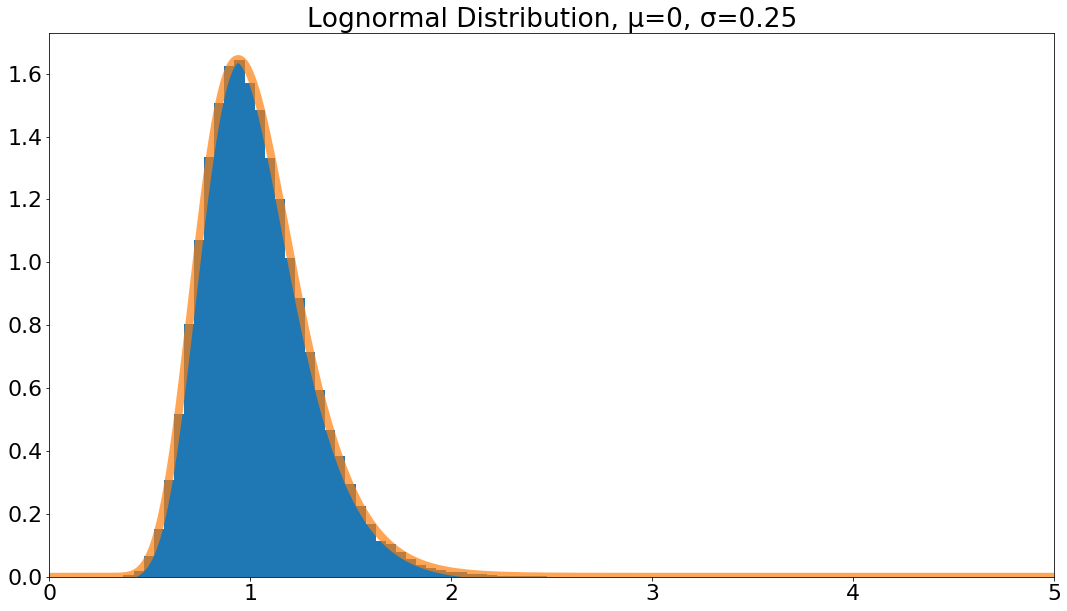

In [15]:
dist = stats.lognorm(0.25, 0)
samples = dist.rvs(100_000)

plt.title("Lognormal Distribution, μ=0, σ=0.25")
plt.hist(samples, 50, density=True)
plt.xlim([0, 5])
x = np.linspace(0, 5, 1000)
plt.plot(x, dist.pdf(x), linewidth = 8, alpha = 0.7);

Let's choose an arbitrary signal threshold for a hypothetical measurement: 2

What is the probability that I find a value that is as signal-like or more signal-like than 2 in my signal-free data?

That is, we must find $\int_{2}^{\infty} \frac{1}{x\sigma\sqrt{2\pi}} \exp \left(-\frac{(\ln{x} - \mu)^2}{2\sigma^2}\right) dx$ for $\mu = 0, \sigma = 0.25$

We can use the survival function `sf` to evaluate the integral:

In [16]:
dist.sf(2)

0.002780617862309522

This probability is about 0.28%. Let's convert it to the form $X\sigma$.

In [17]:
# How far must we integrate the standard normal distribution to get the same probability?
stats.norm.ppf(dist.sf(2))

-2.772588722239781

Therefore, the probability that I measure a value that is as signal-like or more signal-like than 2 in my signal-free data is $2.77\sigma$

Let's keep increasing the threshold for what constitutes a signal.

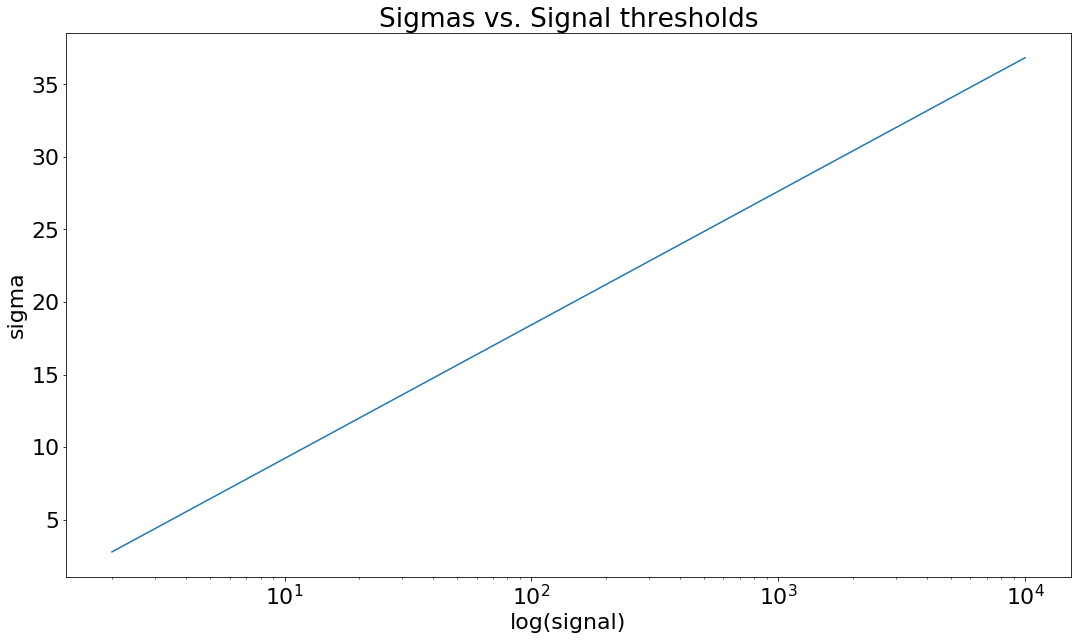

In [18]:
signals = np.linspace(2, 10000, 200)
sigmas = np.abs(stats.norm.ppf(dist.sf(signals)))

plt.title("Sigmas vs. Signal thresholds")
plt.xlabel("log(signal)")
plt.ylabel("sigma")
plt.semilogx(signals, sigmas);

This tells us that the probability (expressed as a number of sigmas) of finding a data point that is as signal-like or more signal-like than some signal threshold is linearly related to the log of the threshold.